In [2]:
%pylab inline
import cv2 as cv
import numpy as np
import argparse

Populating the interactive namespace from numpy and matplotlib


In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets 

In [4]:
from structure_tensor import *
if 0: # enable if needed
    import sys
    sys.path.insert(0, "/home/luca/Code/sharpy.git/")
    import sharpy
    man = sharpy.SharadRadagramsManager()
    man.getRadargram("00429402").getProduct("JPG")  # this cause to download the image

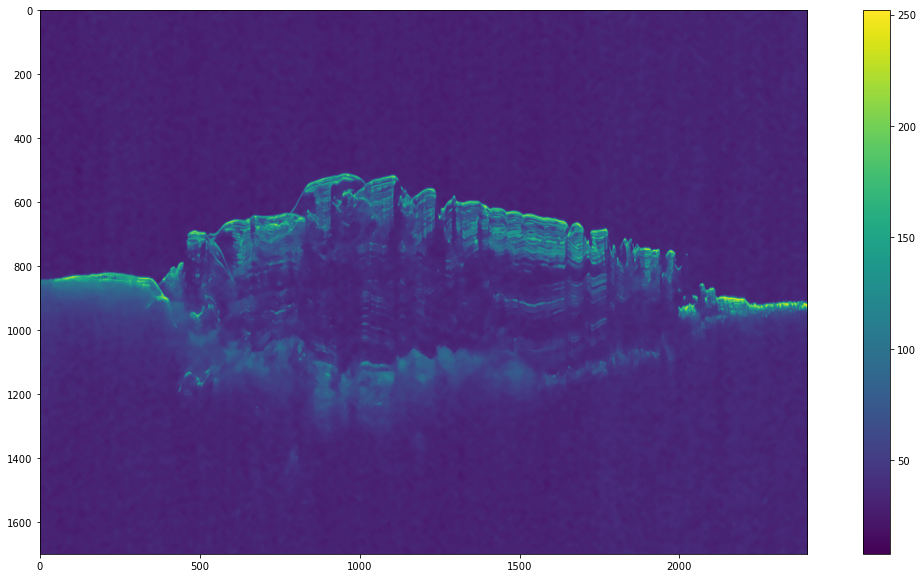

In [5]:
image = ApplyDenoising("sharad_data/s_00429402_thm.jpg")

imgInTiny, imgCoherency, ori, imgCoherencyBin, ori_bin, imgBin, imgBinClear = ApplyStructureTensor(image)

figure(figsize=(20,10))

imshow(imgInTiny)
colorbar()

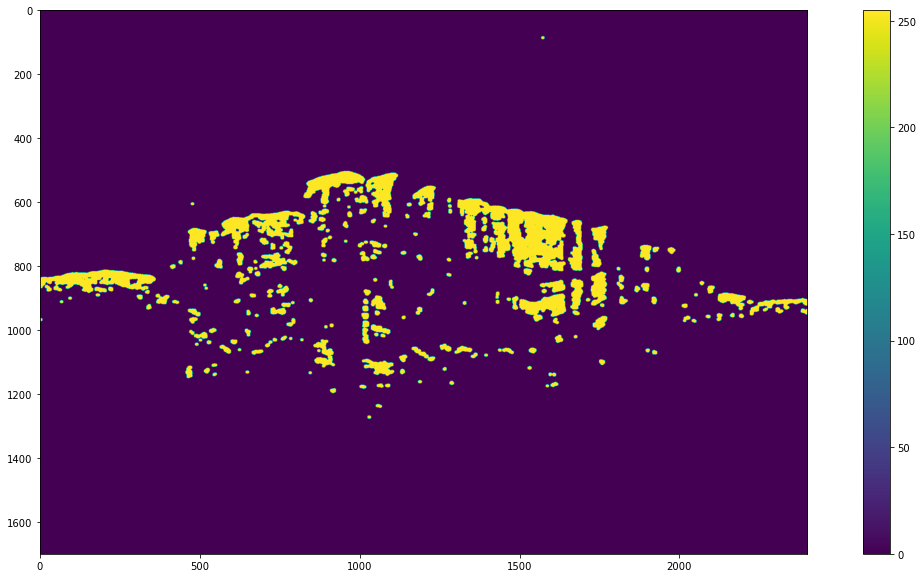

In [6]:
figure(figsize=(20,10))

imshow(imgBinClear)
colorbar()

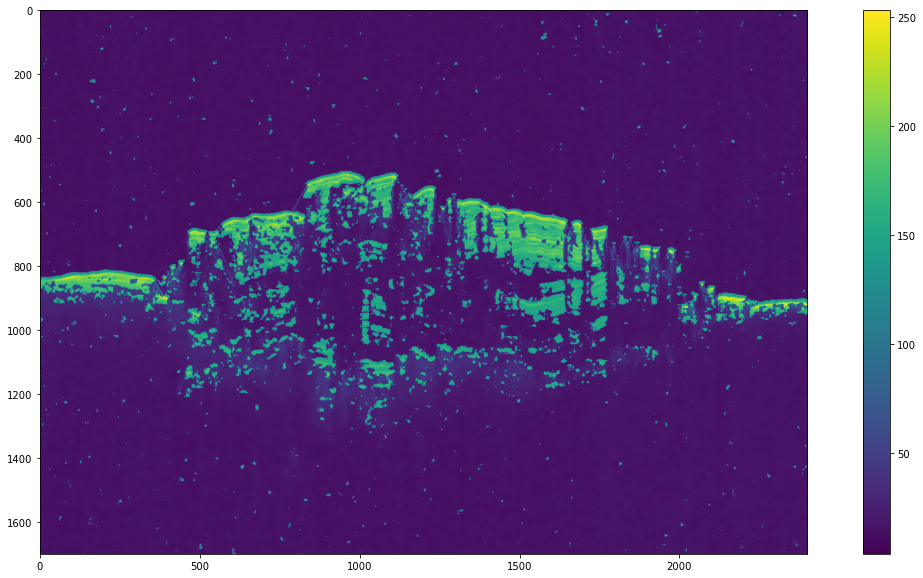

In [7]:
#res = np.uint8(0.5*(imgIn + imgBin))
resTiny = np.uint8(0.5*(imgInTiny + imgBin))
Edges = cv.Canny(imgInTiny,50,100) #2nd,3rd: lower and upper threshold

figure(figsize=(20,10))

imshow(resTiny)
colorbar()

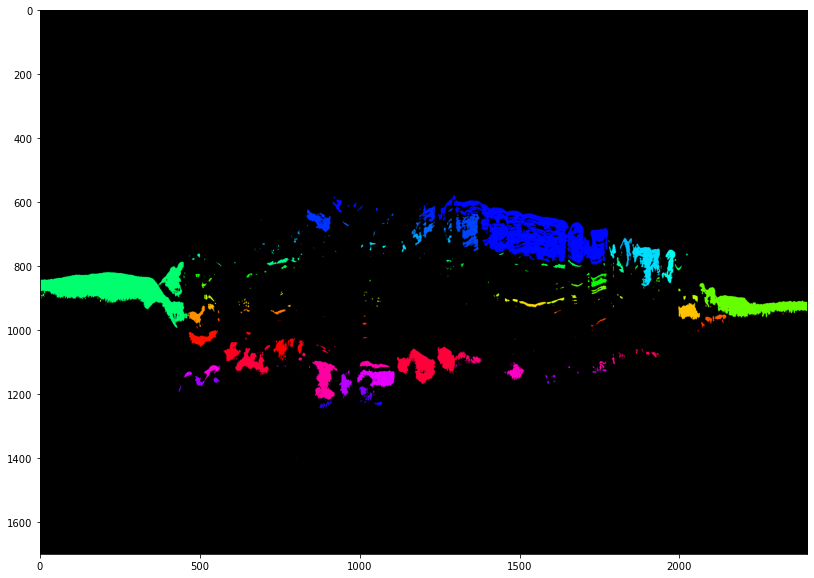

In [8]:
from ConnectedComp import imshow_components

figure(figsize=(20,10))
a = imshow_components(imgInTiny)
imshow(a)

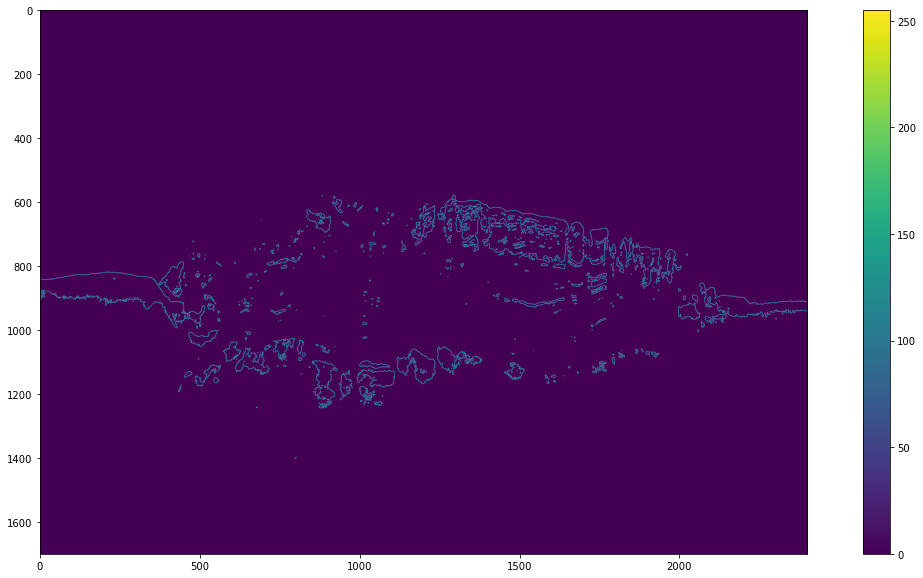

In [9]:
cannylab = cv.Canny(a,50,100)
figure(figsize=(20,10))
imshow(cannylab)
colorbar()

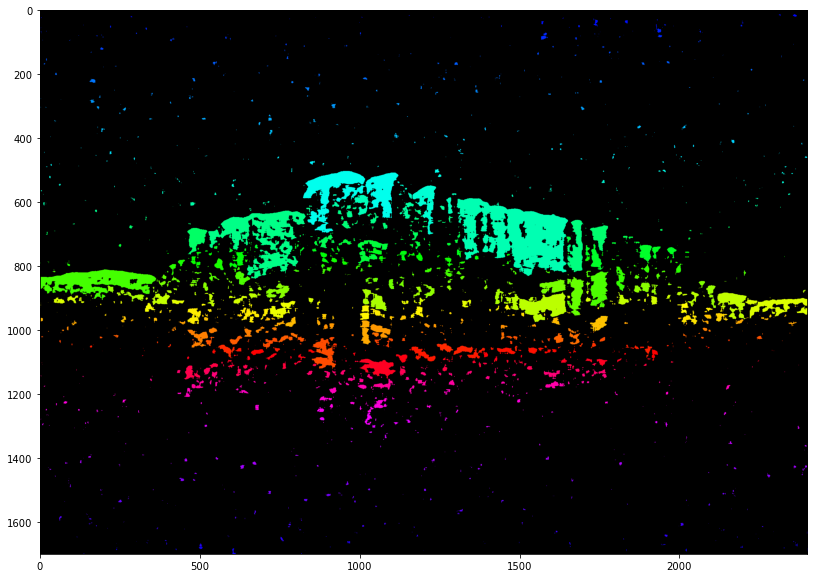

In [10]:
from ConnectedComp import connected_components_for_binaryimg

ori_conncomp = connected_components_for_binaryimg(ori_bin)    

figure(figsize=(20,10))
imshow(ori_conncomp)

# Selection of bigger components

In [11]:
#selection of connected components with pixel area > certain value (valuemean)

from ConnectedComp import selection

index, areas, arearray = selection(imgInTiny)

Total number of connected components: 490
Average area of connected components: 8326.530612244898
Labels of connected components with pixel area higher than average: [0, 1, 3, 131, 198]
Number of pixels of each selected area: [3862598, 47344, 44073, 34923, 13037]

[[      0 3862598]
 [      1   47344]
 [      3   44073]
 [    131   34923]
 [    198   13037]]


New label for 0 component: 0
New label for 1 component: 51
New label for 3 component: 102
New label for 131 component: 153
New label for 198 component: 204


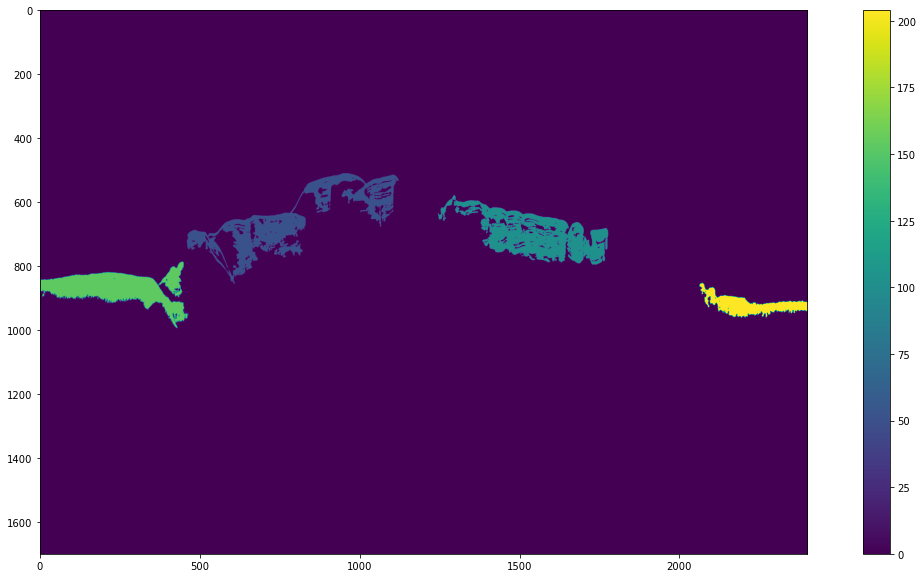

In [12]:
#new array image with only the components having area[pixel]> average area of all components
from ConnectedComp import newimgbigcomponents

newimg, huenewimg = newimgbigcomponents(imgInTiny,index)

figure(figsize=(20,10))
imshow(newimg)
colorbar()

#imsave('conncomp_selection.png',newimg,vmin=newimg.min(), vmax=newimg.max())

In [13]:
import imageio
newimg_uint8 = np.uint8(179*newimg/np.max(newimg))
imageio.imwrite('conncomp_selection.png', newimg_uint8)

print(newimg_uint8.dtype)

uint8


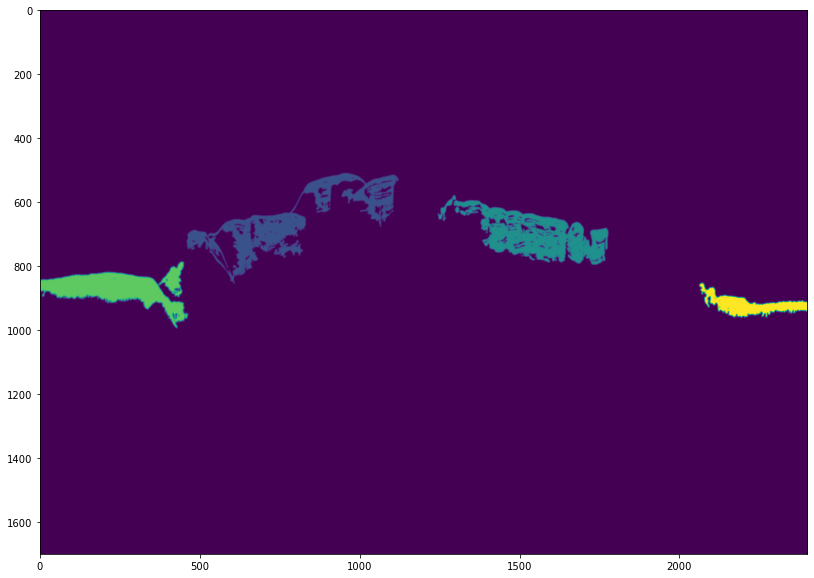

In [14]:
#with edges
figure(figsize=(20,10))
imshow(newimg,interpolation='bicubic')
#imshow(newimg,interpolation='spline16')
#imshow(newimg,interpolation='spline36')

In [15]:
indexoribin, areasoribin, arrayoribin = selection(ori_bin)

Total number of connected components: 2132
Average area of connected components: 1913.6960600375235
Labels of connected components with pixel area higher than average: [0, 387, 390, 426, 467, 524, 546, 571, 581, 637, 815, 829, 866, 881, 960, 981, 995, 1034, 1056, 1328, 1484]
Number of pixels of each selected area: [3802133, 11633, 9649, 4358, 46439, 24758, 4909, 2384, 2935, 2506, 17610, 4600, 3541, 2280, 2405, 8808, 3861, 4935, 1997, 3609, 3524]

[[      0 3802133]
 [    387   11633]
 [    390    9649]
 [    426    4358]
 [    467   46439]
 [    524   24758]
 [    546    4909]
 [    571    2384]
 [    581    2935]
 [    637    2506]
 [    815   17610]
 [    829    4600]
 [    866    3541]
 [    881    2280]
 [    960    2405]
 [    981    8808]
 [    995    3861]
 [   1034    4935]
 [   1056    1997]
 [   1328    3609]
 [   1484    3524]]


New label for 0 component: 0
New label for 387 component: 12
New label for 390 component: 24
New label for 426 component: 36
New label for 467 component: 48
New label for 524 component: 60
New label for 546 component: 72
New label for 571 component: 84
New label for 581 component: 96
New label for 637 component: 108
New label for 815 component: 120
New label for 829 component: 132
New label for 866 component: 144
New label for 881 component: 156
New label for 960 component: 168
New label for 981 component: 180
New label for 995 component: 192
New label for 1034 component: 204
New label for 1056 component: 216
New label for 1328 component: 228
New label for 1484 component: 240


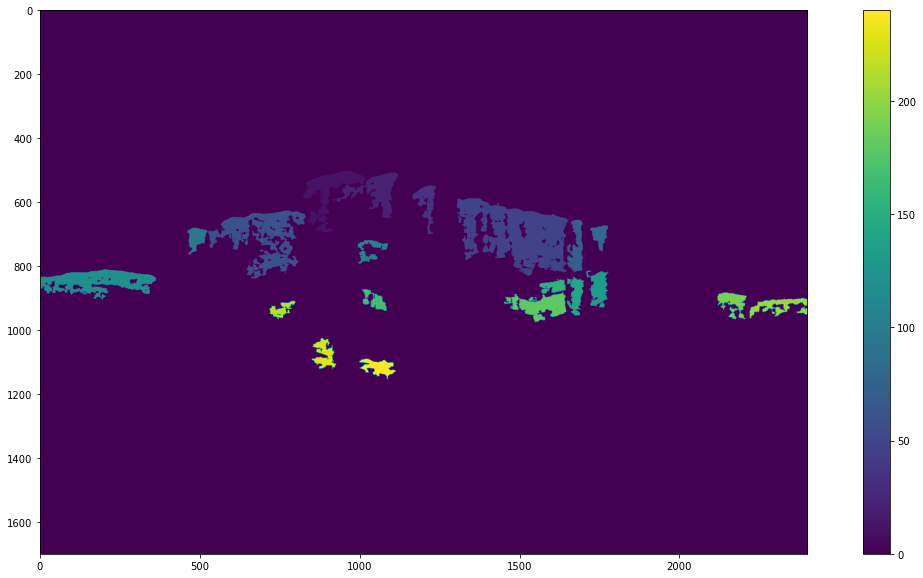

In [16]:
figure(figsize=(20,10))
imshow(newimgbigcomponents(ori_bin,indexoribin)[0])
colorbar()

# Interactive

In [17]:
def threshold(img, thr):
    img = cv.threshold(img, thr, 255, cv.THRESH_BINARY)[1]
    figure(figsize=(20,10))
    imshow(img)

interact(threshold, img=fixed(imgInTiny), thr=(0,255))

interactive(children=(IntSlider(value=127, description='thr', max=255), Output()), _dom_classes=('widget-inter…

<function __main__.threshold(img, thr)>

In [19]:
def connected_components(img, thr):
    img = cv.threshold(img, thr, 255, cv.THRESH_BINARY)[1]  # ensure binary
    num_labels, labels = cv.connectedComponents(img)
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    #print (blank_ch)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    figure(figsize=(20,10))
    imshow(labeled_img)

interact(connected_components, img=fixed(imgInTiny), thr=(0,255))

interactive(children=(IntSlider(value=127, description='thr', max=255), Output()), _dom_classes=('widget-inter…

<function __main__.connected_components(img, thr)>

# Finding edges

In [20]:
#finding upper edge 
from ConnectedComp import FindingUpperEdges

edges, upperlimitx, upperlimity = FindingUpperEdges(newimg, huenewimg)

column 0 upper edge at: 843 , with label: 153
column 1 upper edge at: 843 , with label: 153
column 2 upper edge at: 843 , with label: 153
column 3 upper edge at: 843 , with label: 153
column 4 upper edge at: 843 , with label: 153
column 5 upper edge at: 842 , with label: 153
column 6 upper edge at: 843 , with label: 153
column 7 upper edge at: 843 , with label: 153
column 8 upper edge at: 843 , with label: 153
column 9 upper edge at: 843 , with label: 153
column 10 upper edge at: 843 , with label: 153
column 11 upper edge at: 842 , with label: 153
column 12 upper edge at: 842 , with label: 153
column 13 upper edge at: 842 , with label: 153
column 14 upper edge at: 842 , with label: 153
column 15 upper edge at: 842 , with label: 153
column 16 upper edge at: 842 , with label: 153
column 17 upper edge at: 842 , with label: 153
column 18 upper edge at: 843 , with label: 153
column 19 upper edge at: 843 , with label: 153
column 20 upper edge at: 843 , with label: 153
column 21 upper edge at

In [24]:
#finding lower edge 
from ConnectedComp import FindingLowerEdges
            
edges, lowerlimitx, lowerlimity = FindingLowerEdges(newimg, huenewimg, edges)

column 0 lower edge at: 826 (not reversed value), right reversed value: 874 , with label: 153
column 1 lower edge at: 823 (not reversed value), right reversed value: 877 , with label: 153
column 2 lower edge at: 821 (not reversed value), right reversed value: 879 , with label: 153
column 3 lower edge at: 821 (not reversed value), right reversed value: 879 , with label: 153
column 4 lower edge at: 821 (not reversed value), right reversed value: 879 , with label: 153
column 5 lower edge at: 822 (not reversed value), right reversed value: 878 , with label: 153
column 6 lower edge at: 822 (not reversed value), right reversed value: 878 , with label: 153
column 7 lower edge at: 807 (not reversed value), right reversed value: 893 , with label: 153
column 8 lower edge at: 803 (not reversed value), right reversed value: 897 , with label: 153
column 9 lower edge at: 806 (not reversed value), right reversed value: 894 , with label: 153
column 10 lower edge at: 807 (not reversed value), right rev

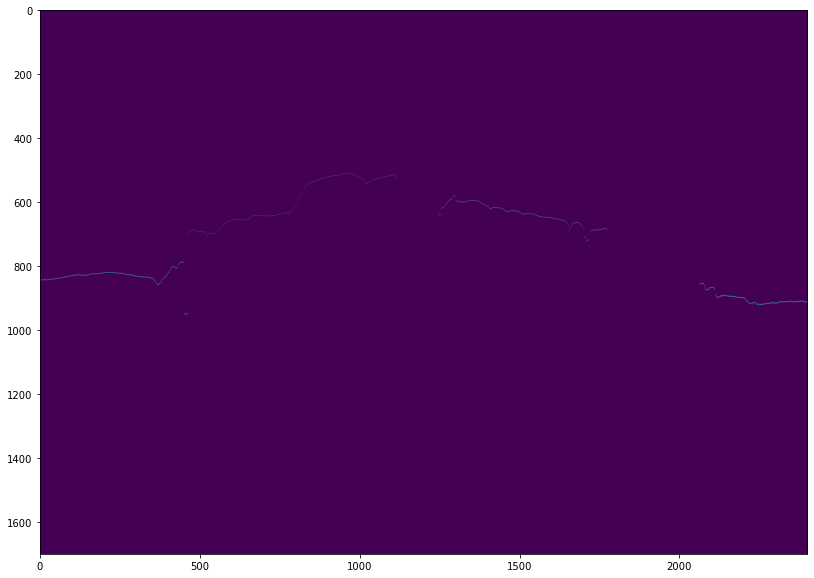

In [21]:
figure(figsize=(20,10))
imshow(edges)

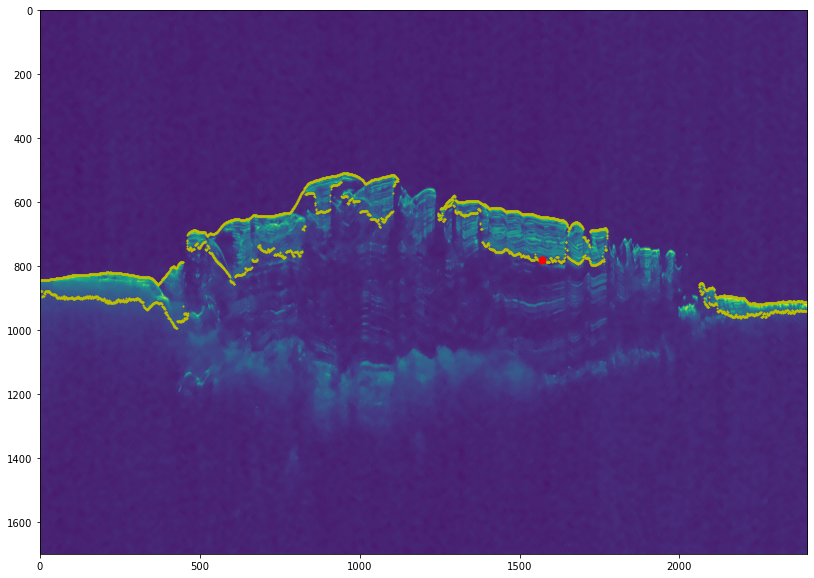

In [25]:
figure(figsize=(20,10))
imshow(imgInTiny)
plt.scatter(upperlimity,upperlimitx, c='y', s=1)
plt.scatter(lowerlimity,lowerlimitx, c='y', s=1)
plt.scatter(lowerlimity[1450],lowerlimitx[1450], c='r', s=50)
#plt.savefig('tshirtPT.png', dpi=1600)

# Thickness

[   0    1    2 ... 2397 2398 2399]
[31 34 36 ... 28 28 27]


Text(0, 0.5, 'Connected Component Thickness [px]')

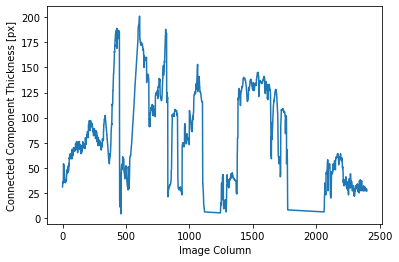

In [26]:
from ConnectedComp import Thickness

deltacolumn, delta = Thickness(upperlimity, upperlimitx, lowerlimity, lowerlimitx)
print(deltacolumn)
print(delta)

plt.plot(deltacolumn, delta)
plt.xlabel('Image Column')
plt.ylabel('Connected Component Thickness [px]')

In [27]:
deltalist = delta.tolist()
print(deltalist.index(4))

466


In [28]:
from ConnectedComp import Conversion
#This function has 3 possible argument: a thickness values array in pixel for each column of the selected connected components
#Data type specification: automatically US data (important for pixel to second conversion), specify "ITA" for italian data
#Value for dieletric const. : automatically eps = 3.15 from Putzig et al. 2009, tipical of pure water ice

deltasec, deltakm, deltam = Conversion(delta)

Thickness [sec] [1.1625e-06 1.2750e-06 1.3500e-06 ... 1.0500e-06 1.0500e-06 1.0125e-06]
Maximum thickness [microsec] 7.5375
Thickness [m]: [ 98.18121267 107.68262035 114.01689214 ...  88.67980499  88.67980499
  85.5126691 ]
Maximum thickness [m]: 636.5943144282279
Average thickness [m]: 269.92570504271316


Text(0, 0.5, 'Connected Component Thickness [m]')

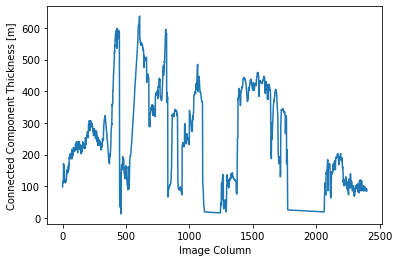

In [29]:
plt.plot(deltacolumn, deltam)
plt.xlabel('Image Column')
plt.ylabel('Connected Component Thickness [m]')

# Column selection

In [37]:
data = {"lowerlimit":[lowerlimitx, lowerlimity], "upperlimit":[upperlimitx, upperlimity], "image":imgInTiny}
np.savez("data", **data) # here we save the data in a file so we can do the anaylysis elsewhere

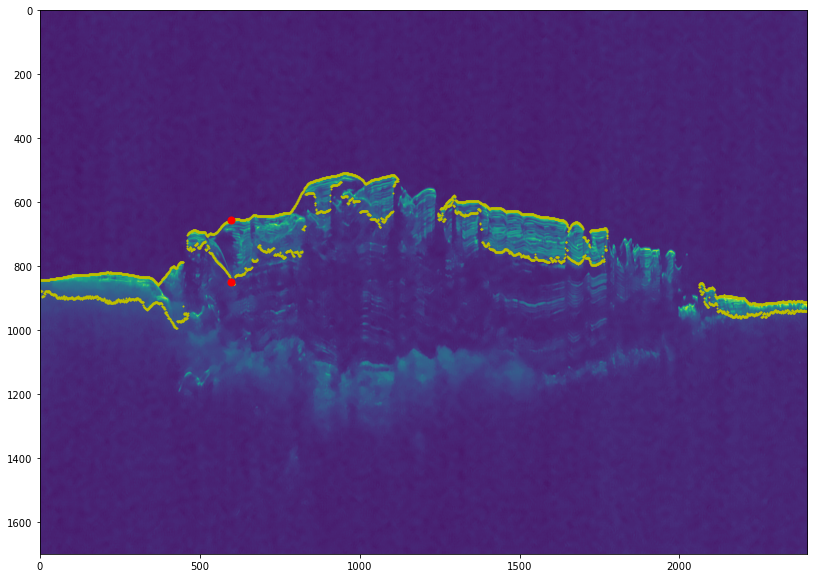

In [30]:
#first attempt
figure(figsize=(20,10))
imshow(imgInTiny)
plt.scatter(upperlimity,upperlimitx, c='y', s=1)
plt.scatter(lowerlimity,lowerlimitx, c='y', s=1)
plt.scatter(lowerlimity[602],lowerlimitx[602], c='r', s=50)
plt.scatter(upperlimity[602],upperlimitx[602], c='r', s=50)

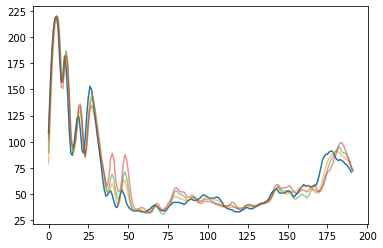

In [66]:
a = imgInTiny[upperlimitx[602]:lowerlimitx[602],upperlimity[602]]
plot(a)
b = imgInTiny[upperlimitx[603]:lowerlimitx[603],upperlimity[603]]
plot(b,alpha=0.5)
c = imgInTiny[upperlimitx[604]:lowerlimitx[604],upperlimity[604]]
plot(c,alpha=0.5)
d = imgInTiny[upperlimitx[605]:lowerlimitx[605],upperlimity[605]]
plot(d,alpha=0.5)

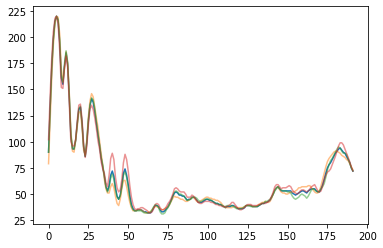

In [236]:
#case in which the selected columns have the same lenght and initial and final point (only b, c, d)

new = np.zeros_like(b) 
for i in range(len(b)):
    new[i] = (np.uint16(b[i])+np.uint16(c[i])+np.uint16(d[i]))/3

    
plot(new)
plot(b,alpha=0.5)
plot(c,alpha=0.5)
plot(d,alpha=0.5)

C:\Users\Alfonso Lovati\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 192, using nperseg = 192
  .format(nperseg, input_length))


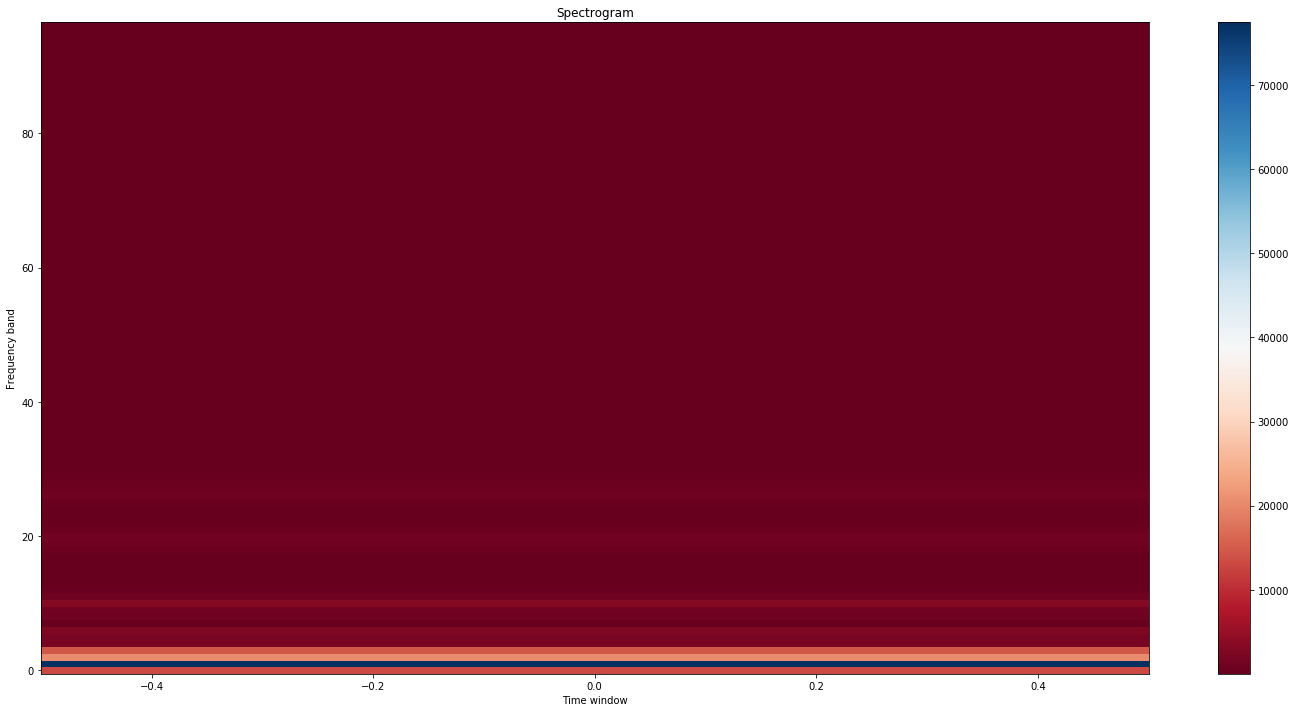

In [237]:
from scipy import signal
#T = 0.0375*10**(-6)
#fs = 1/T

freqs1, times, spectrogram = signal.spectrogram(new) #, fs)

plt.figure(figsize=(20, 10))
plt.imshow(spectrogram, aspect='auto', cmap='RdBu', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.colorbar()
plt.tight_layout()

In [238]:
print (1/freqs1[1:])
print (np.mean(freqs1))
print (np.std(freqs1))

[192.          96.          64.          48.          38.4
  32.          27.42857143  24.          21.33333333  19.2
  17.45454545  16.          14.76923077  13.71428571  12.8
  12.          11.29411765  10.66666667  10.10526316   9.6
   9.14285714   8.72727273   8.34782609   8.           7.68
   7.38461538   7.11111111   6.85714286   6.62068966   6.4
   6.19354839   6.           5.81818182   5.64705882   5.48571429
   5.33333333   5.18918919   5.05263158   4.92307692   4.8
   4.68292683   4.57142857   4.46511628   4.36363636   4.26666667
   4.17391304   4.08510638   4.           3.91836735   3.84
   3.76470588   3.69230769   3.62264151   3.55555556   3.49090909
   3.42857143   3.36842105   3.31034483   3.25423729   3.2
   3.14754098   3.09677419   3.04761905   3.           2.95384615
   2.90909091   2.86567164   2.82352941   2.7826087    2.74285714
   2.70422535   2.66666667   2.63013699   2.59459459   2.56
   2.52631579   2.49350649   2.46153846   2.43037975   2.4
   2.37037037   2.

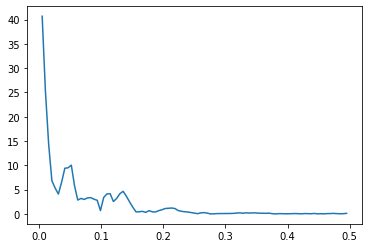

In [178]:
from numpy import fft

freqs = fft.fftfreq(len(b))

mask = freqs > 0

nwaves = freqs*len(b) #wave numbers: number of waves the signal needs to occupy the domain

fftvals = fft.fft(new)

fft_th = 2.0*np.abs(fftvals/len(b))
#print (fft_th[mask])

plt.plot(freqs[mask], fft_th[mask])
plt.show()

In [197]:
#conversion of the frequencies of the higher peaks to meters (?)

higher = np.where(fft_th[mask]>= 5.0e+00)
print(higher)

high_freq = []

for i in range(len(higher)):
    high_freq.append(freqs[mask][higher[i]])
    
print(high_freq)

high_freq_px = 1/high_freq[0]

high_freq_converted = Conversion(high_freq_px)
print (high_freq_converted[2])

(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10], dtype=int64),)
[array([0.00520833, 0.01041667, 0.015625  , 0.02083333, 0.02604167,
       0.03645833, 0.04166667, 0.046875  , 0.05208333, 0.05729167])]
Thickness [sec] [7.20000000e-06 3.60000000e-06 2.40000000e-06 1.80000000e-06
 1.44000000e-06 1.02857143e-06 9.00000000e-07 8.00000000e-07
 7.20000000e-07 6.54545455e-07]
Maximum thickness [microsec] 7.199999999999999
Thickness [m]: [608.09009139 304.0450457  202.69669713 152.02252285 121.61801828
  86.87001306  76.01126142  67.56556571  60.80900914  55.2809174 ]
Maximum thickness [m]: 608.0900913941282
Average thickness [m]: 173.50091420798339
[608.09009139 304.0450457  202.69669713 152.02252285 121.61801828
  86.87001306  76.01126142  67.56556571  60.80900914  55.2809174 ]


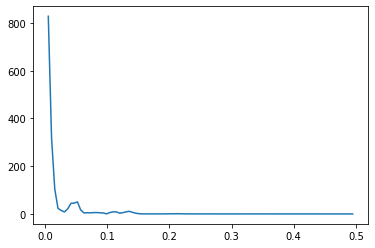

In [172]:
#power spectrum
ps = 2.0*(np.abs(fftvals/len(b))**2)

plt.plot(freqs[mask], ps[mask])
plt.show()

In [85]:
#cross checks

mean_new = np.mean(new)
std_new = np.std(new)
var_new = std_new**2

print (mean_new, std_new, var_new)

#sum of ps values
print ('ps sum:', np.sum(ps[mask]))
#number of values equal between var_new and ps sum give an idea of accuracy

65.63541666666667 39.706768889695894 1576.6274956597217
ps sum: 1576.6270616319441


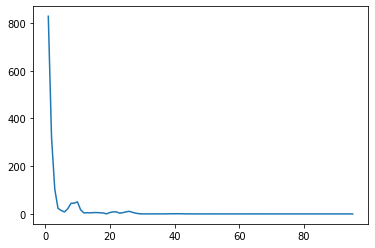

In [88]:
plt.plot(nwaves[mask], ps[mask])
plt.show()

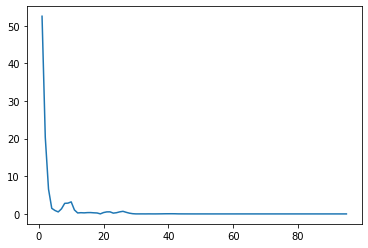

In [93]:
#to understand in witch percentage every freq contribute to the total signal

pow_var = ps/var_new*100.0

plt.plot(nwaves[mask], pow_var[mask])
plt.show()

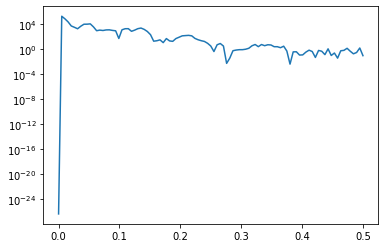

In [176]:
#Periodgram

f, Pxx_den = signal.periodogram(new)
plt.semilogy(f, Pxx_den)
#plt.plot(f,Pxx_den)
plt.show()

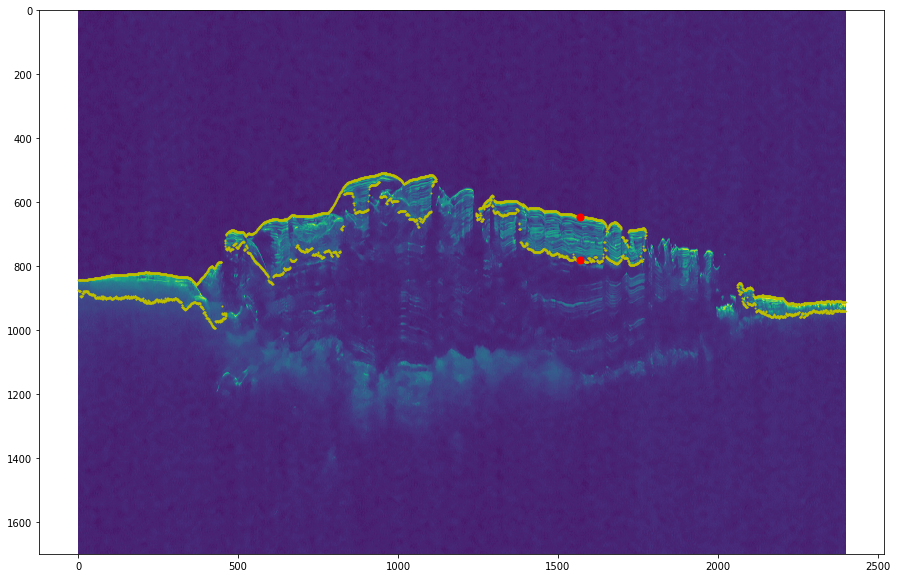

In [222]:
#second attempt
figure(figsize=(20,10))
imshow(imgInTiny)
plt.scatter(upperlimity,upperlimitx, c='y', s=1)
plt.scatter(lowerlimity,lowerlimitx, c='y', s=1)
plt.scatter(lowerlimity[1450],lowerlimitx[1450], c='r', s=50)
plt.scatter(upperlimity[1450],upperlimitx[1450], c='r', s=50)

135 134 134 134
646 781
647 781
647 781
647 781


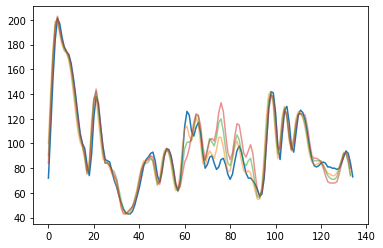

In [228]:
e = imgInTiny[upperlimitx[1450]:lowerlimitx[1450],upperlimity[1450]]
plot(e)
f = imgInTiny[upperlimitx[1451]:lowerlimitx[1451],upperlimity[1451]]
plot(f,alpha=0.5)
g = imgInTiny[upperlimitx[1452]:lowerlimitx[1452],upperlimity[1452]]
plot(g,alpha=0.5)
h = imgInTiny[upperlimitx[1453]:lowerlimitx[1453],upperlimity[1453]]
plot(h,alpha=0.5)

print (len(e), len(f), len(g), len(h))
print (upperlimitx[1450], lowerlimitx[1450]) #different initial coordinate
print (upperlimitx[1451], lowerlimitx[1451])
print (upperlimitx[1452], lowerlimitx[1452])
print (upperlimitx[1453], lowerlimitx[1453])

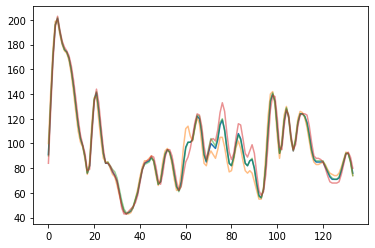

In [231]:
#case in which the selected columns have the same lenght and initial and final point (only f, g, h)

new1 = np.zeros_like(f) 
for i in range(len(f)):
    new1[i] = (np.uint16(f[i])+np.uint16(g[i])+np.uint16(h[i]))/3

    
plot(new1)
plot(f,alpha=0.5)
plot(g,alpha=0.5)
plot(h,alpha=0.5)

C:\Users\Alfonso Lovati\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 134, using nperseg = 134
  .format(nperseg, input_length))


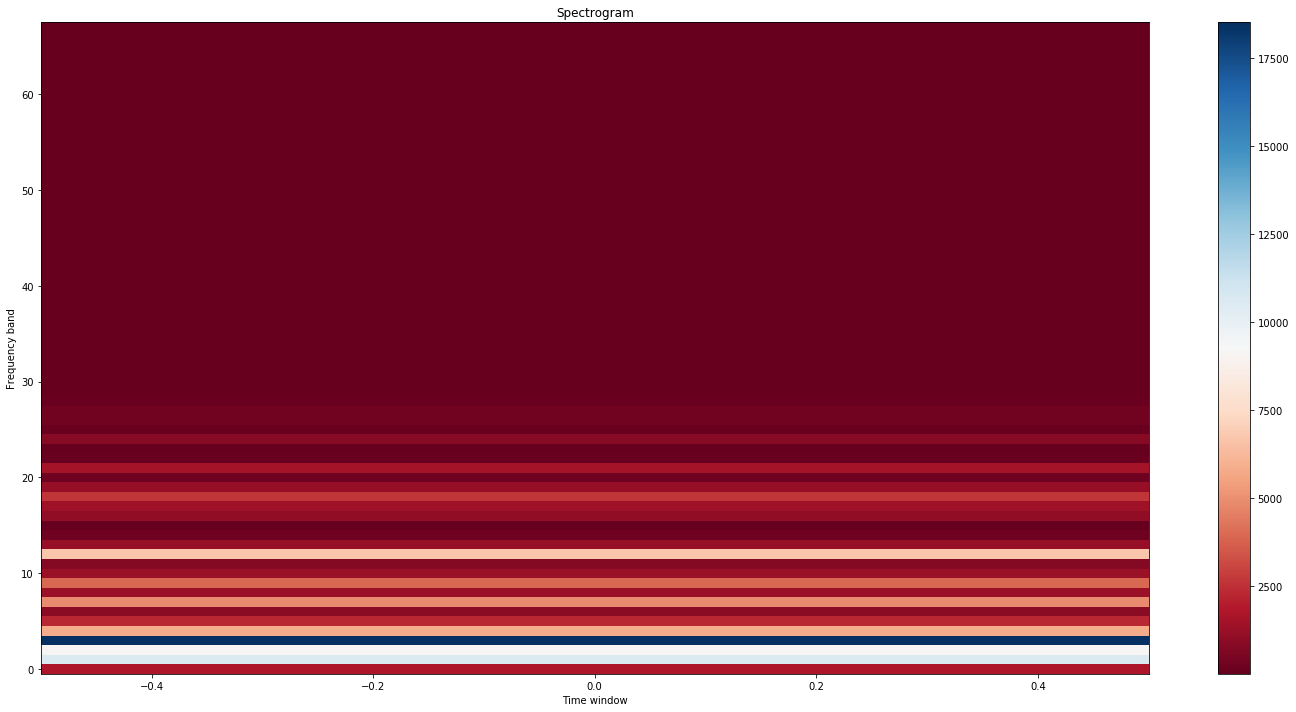

In [232]:
from scipy import signal

freqs11, times1, spectrogram1 = signal.spectrogram(new1) #, fs)

plt.figure(figsize=(20, 10))
plt.imshow(spectrogram1, aspect='auto', cmap='RdBu', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.colorbar()
plt.tight_layout()

In [239]:
print (1/freqs1[1:])
print (np.mean(freqs1))
print (np.std(freqs1))

[192.          96.          64.          48.          38.4
  32.          27.42857143  24.          21.33333333  19.2
  17.45454545  16.          14.76923077  13.71428571  12.8
  12.          11.29411765  10.66666667  10.10526316   9.6
   9.14285714   8.72727273   8.34782609   8.           7.68
   7.38461538   7.11111111   6.85714286   6.62068966   6.4
   6.19354839   6.           5.81818182   5.64705882   5.48571429
   5.33333333   5.18918919   5.05263158   4.92307692   4.8
   4.68292683   4.57142857   4.46511628   4.36363636   4.26666667
   4.17391304   4.08510638   4.           3.91836735   3.84
   3.76470588   3.69230769   3.62264151   3.55555556   3.49090909
   3.42857143   3.36842105   3.31034483   3.25423729   3.2
   3.14754098   3.09677419   3.04761905   3.           2.95384615
   2.90909091   2.86567164   2.82352941   2.7826087    2.74285714
   2.70422535   2.66666667   2.63013699   2.59459459   2.56
   2.52631579   2.49350649   2.46153846   2.43037975   2.4
   2.37037037   2.

[14.95507371 18.37524007 19.700933   16.53461485  5.98244988  9.06679452
 14.38308075  3.40731815  7.64045924  5.90072126  4.2960441   6.98573749
  4.30603429  3.60591984  3.20540655  5.78111228  6.30594692  4.07217601
  2.6781733   3.64533345  5.28834575  2.25205715  1.20005139  3.56563805
  2.10947759  1.14640895  1.6683203   1.2445018   1.34053781  0.862873
  0.47859572  0.64293038  0.38384062  0.09298426  0.32420003  0.45561789
  0.57218838  0.43701871  0.1546538   0.15441006  0.26809808  0.41622493
  0.16950964  0.18716732  0.24339387  0.36358759  0.09833934  0.09387636
  0.1642427   0.1408538   0.07090267  0.15825145  0.24191959  0.20734525
  0.14006845  0.13396513  0.12834606  0.09029937  0.04241483  0.06533958
  0.10557144  0.02230711  0.08374803  0.02673817  0.10266075  0.03348352]


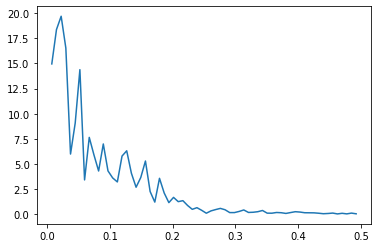

In [245]:
freqs2 = fft.fftfreq(len(f))

mask2 = freqs2 > 0

nwaves2 = freqs2*len(f) #wave numbers: number of waves the signal needs to occupy the domain

fftvals2 = fft.fft(new1)

fft_th2 = 2.0*np.abs(fftvals2/len(f))
print (fft_th2[mask2])

plt.plot(freqs2[mask2], fft_th2[mask2])
plt.show()

In [246]:
#conversion of the frequencies of the higher peaks to meters (?)

higher2 = np.where(fft_th2[mask2]>= 5.0e+00)
print(higher2)

high_freq2 = []

for i in range(len(higher2)):
    high_freq2.append(freqs2[mask2][higher2[i]])
    
print(high_freq2)

high_freq_px2 = 1/high_freq2[0]

high_freq_converted2 = Conversion(high_freq_px2)
print (high_freq_converted2[2])

(array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11, 15, 16, 20], dtype=int64),)
[array([0.00746269, 0.01492537, 0.02238806, 0.02985075, 0.03731343,
       0.04477612, 0.05223881, 0.06716418, 0.07462687, 0.08955224,
       0.11940299, 0.12686567, 0.15671642])]
Thickness [sec] [5.02500000e-06 2.51250000e-06 1.67500000e-06 1.25625000e-06
 1.00500000e-06 8.37500000e-07 7.17857143e-07 5.58333333e-07
 5.02500000e-07 4.18750000e-07 3.14062500e-07 2.95588235e-07
 2.39285714e-07]
Maximum thickness [microsec] 5.025
Thickness [m]: [424.39620962 212.19810481 141.46540321 106.0990524   84.87924192
  70.7327016   60.62802995  47.1551344   42.43962096  35.3663508
  26.5247631   24.96448292  20.20934332]
Maximum thickness [m]: 424.39620961881866
Average thickness [m]: 99.77372607786957
[424.39620962 212.19810481 141.46540321 106.0990524   84.87924192
  70.7327016   60.62802995  47.1551344   42.43962096  35.3663508
  26.5247631   24.96448292  20.20934332]


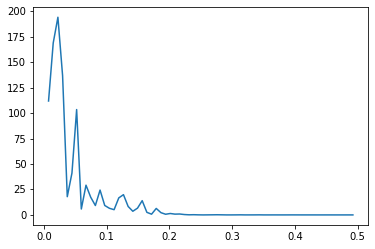

In [247]:
#power spectrum
ps2 = 2.0*(np.abs(fftvals2/len(f))**2)

plt.plot(freqs2[mask2], ps2[mask2])
plt.show()